# Hand Drawn Cluster Labeler

This code uses pre-dawn dapi surface image data to automatically group the surface into clusters and return the labels to the original data set. 

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan


csv_files = glob.glob('csv_for_tools/*.csv')

# 2. Error if none found
if not csv_files:
    raise FileNotFoundError("No CSV files found in 'csv_for_tools/'")

# 3. Pick the first CSV
first_csv = csv_files[0]
print(f"Reading: {first_csv}")

# 4. Read into a DataFrame
# df = pd.read_csv(first_csv)
df = pd.read_csv(first_csv)

df

Reading: csv_for_tools/cleaned_folder2 (1).csv


,POSITION X,POSITION Y,POSITION Z,UNIT,CATEGORY,COLLECTION,TIME,ID,UNNAMED: 8,CD3,...,H3CIT CD68- LY6G+,IL10,CD40,LY6G IN CONTACT WITH CD68,PDL1,CD68,H3CIT LY6G CLOSE TO CD68,H3CIT,cell_type,hdbscan_cluster
0,65165.043,47718.012,-1,µm,Surface,Position,1,3371,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
1,65026.387,47843.957,0,µm,Surface,Position,1,3372,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
2,64990.465,47872.090,-2,µm,Surface,Position,1,3373,0,0,...,0,0,0,0,1,0,0,0,tumor cell / other immune cell,-1
3,65164.086,47707.301,-1,µm,Surface,Position,1,3375,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
4,64875.699,47986.750,-2,µm,Surface,Position,1,3376,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232424,61669.824,43809.270,-2,µm,Surface,Position,1,291754,0,0,...,0,0,0,0,0,1,0,0,macrophage,-1
232425,61405.605,44071.590,-1,µm,Surface,Position,1,291759,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
232426,61917.965,43565.699,0,µm,Surface,Position,1,291771,0,0,...,0,1,0,0,0,0,0,0,tumor cell / other immune cell,-1
232427,61681.199,43803.793,0,µm,Surface,Position,1,291785,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1


In [56]:
df.columns

Index(['POSITION X', 'POSITION Y', 'POSITION Z', 'UNIT', 'CATEGORY',
       'COLLECTION', 'TIME', 'ID', 'UNNAMED: 8', 'CD3', 'CD11B', 'LY6G',
       'DOUBLETS', 'CLUSTER POSITION', 'H3CIT CD68- LY6G+', 'IL10', 'CD40',
       'LY6G IN CONTACT WITH CD68', 'PDL1', 'CD68', 'H3CIT LY6G CLOSE TO CD68',
       'H3CIT', 'cell_type', 'hdbscan_cluster'],
      dtype='object')

In [57]:
# POSITION X,POSITION Y,POSITION Z,UNIT,CATEGORY,COLLECTION,TIME,ID,UNNAMED: 8,
# CD68,CD3,CD11B,LY6G,DOUBLETS,CLUSTER POSITION,LY6G CLOSE TO CD68,H3CIT CD68- LY6G+,
# IL10,CD40,PDL1,H3CIT LY6G CLOSE TO CD68,H3CIT,cell_type,hdbscan_cluster


# 'LY6G CLOSE TO CD68'

In [58]:
# assuming your DataFrame is named df
df_filtered = df[
    (df['CD11B'] == 1) &
    (df['CD68'] == 1) &
    (df['LY6G'] == 0)
]

# to view the result
df_filtered


,POSITION X,POSITION Y,POSITION Z,UNIT,CATEGORY,COLLECTION,TIME,ID,UNNAMED: 8,CD3,...,H3CIT CD68- LY6G+,IL10,CD40,LY6G IN CONTACT WITH CD68,PDL1,CD68,H3CIT LY6G CLOSE TO CD68,H3CIT,cell_type,hdbscan_cluster
8,64643.938,48224.344,-3,µm,Surface,Position,1,3381,0,0,...,0,0,0,0,0,1,0,0,macrophage,-1
13,64627.715,48235.488,0,µm,Surface,Position,1,3386,0,0,...,0,1,1,0,0,1,0,0,macrophage,-1
29,64588.812,48278.801,0,µm,Surface,Position,1,3405,0,0,...,0,1,1,0,0,1,0,0,macrophage,-1
30,64594.883,48280.191,-2,µm,Surface,Position,1,3407,0,0,...,0,1,1,0,0,1,0,0,macrophage,-1
35,64627.699,48246.102,-1,µm,Surface,Position,1,3414,0,0,...,0,1,0,0,1,1,0,0,macrophage,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232367,61669.105,43776.359,-3,µm,Surface,Position,1,291504,0,0,...,0,0,0,0,0,1,0,0,macrophage,-1
232377,61660.801,43792.047,0,µm,Surface,Position,1,291548,0,0,...,0,0,0,0,0,1,0,0,macrophage,-1
232380,61663.633,43791.137,-2,µm,Surface,Position,1,291564,0,0,...,0,0,0,0,0,1,0,0,macrophage,-1
232400,61687.496,43780.609,-1,µm,Surface,Position,1,291648,0,0,...,0,0,0,0,0,1,0,0,macrophage,-1


In [59]:
df['CLUSTER POSITION'] = df['CLUSTER POSITION'].replace(0, 'not in cluster')
df

cluster_df = df[df['CLUSTER POSITION'] != 'not in cluster']


In [60]:
df['cell_type'].value_counts()

cell_type
tumor cell / other immune cell                       133133
macrophage                                            39121
other myeloid cell                                    38431
not netting neutrophil                                15026
netting neutrophil                                     6390
t cell                                                  327
not netting neutrophil in contact with macrophage         1
Name: count, dtype: int64

/Users/patrick/Desktop2/lab_proj1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/patrick/Desktop2/lab_proj1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cluster label counts: {np.int64(0): np.int64(362), np.int64(1): np.int64(87), np.int64(2): np.int64(714), np.int64(3): np.int64(944), np.int64(4): np.int64(224), np.int64(5): np.int64(1202), np.int64(6): np.int64(494), np.int64(7): np.int64(879), np.int64(8): np.int64(8745), np.int64(9): np.int64(528), np.int64(10): np.int64(431), np.int64(11): np.int64(8226), np.int64(12): np.int64(1096), np.int64(13): np.int64(364)}


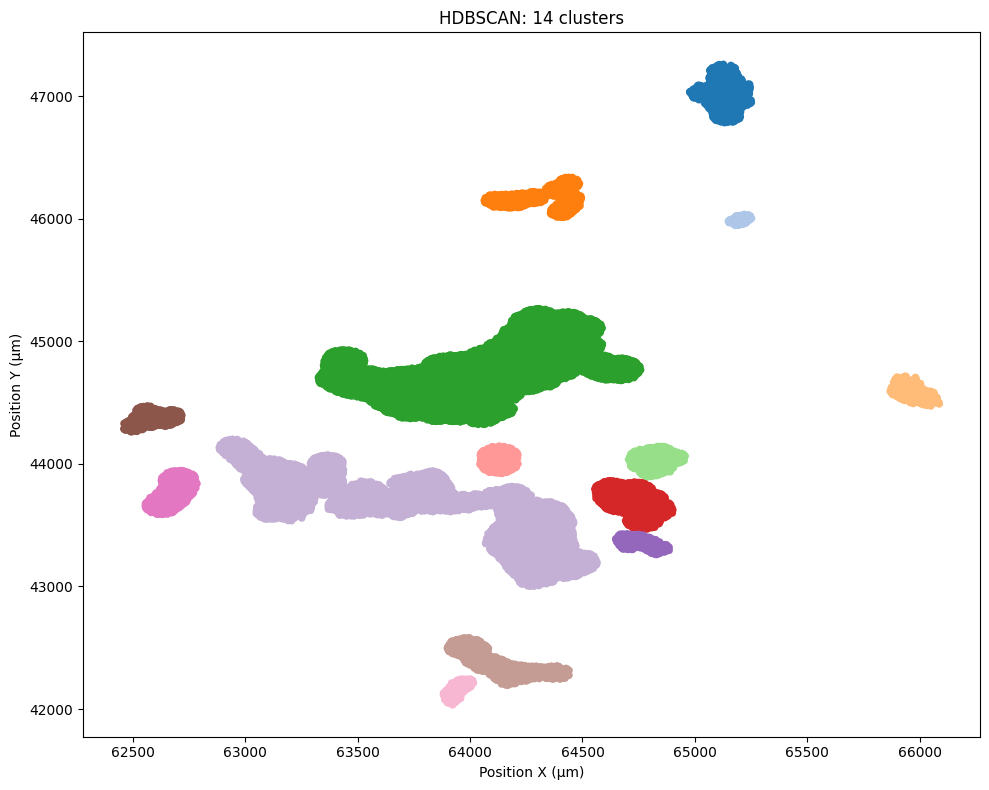

In [61]:
df['CLUSTER POSITION'] = df['CLUSTER POSITION'].replace(0, 'not in cluster')

# 3) Subset only the rows to cluster
cluster_df = df[df['CLUSTER POSITION'] != 'not in cluster'].copy()

# 4) Extract and scale your XY coordinates
coords = cluster_df[['POSITION X', 'POSITION Y']].values
coords_scaled = StandardScaler().fit_transform(coords)

# 5) Run HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=5,
    cluster_selection_epsilon=0.0
)
labels = clusterer.fit_predict(coords_scaled)

# 6) Attach the HDBSCAN labels back onto the subset
cluster_df['hdbscan_cluster'] = labels

# 7) Initialize the cluster column in the full df to -1 (or any sentinel)
df['hdbscan_cluster'] = -1

# 8) Merge your subset’s labels back into the full df using the subset’s index
df.loc[cluster_df.index, 'hdbscan_cluster'] = cluster_df['hdbscan_cluster']

# 9) (Optional) Print out how many points per cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster label counts:", dict(zip(unique, counts)))

# 10) Prepare a plotting DataFrame (omit noise if you like)
mask = cluster_df['hdbscan_cluster'] != -1
df_plot = cluster_df.loc[mask, ['POSITION X', 'POSITION Y']].copy()
df_plot['cluster'] = cluster_df.loc[mask, 'hdbscan_cluster'].astype(str)

# 11) Plot the results
n_clusters = len(unique) - (1 if -1 in unique else 0)
plt.figure(figsize=(10, 8))
palette = 'tab20' if n_clusters > 10 else 'tab10'
legend = False if n_clusters > 10 else 'full'

sns.scatterplot(
    data=df_plot,
    x='POSITION X', y='POSITION Y',
    hue='cluster',
    palette=palette,
    s=30, linewidth=0,
    legend=legend
)
if legend:
    plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left')

plt.title(f'HDBSCAN: {n_clusters} clusters')
plt.xlabel('Position X (µm)')
plt.ylabel('Position Y (µm)')
plt.tight_layout()
plt.show()

In [62]:
df.head()

,POSITION X,POSITION Y,POSITION Z,UNIT,CATEGORY,COLLECTION,TIME,ID,UNNAMED: 8,CD3,...,H3CIT CD68- LY6G+,IL10,CD40,LY6G IN CONTACT WITH CD68,PDL1,CD68,H3CIT LY6G CLOSE TO CD68,H3CIT,cell_type,hdbscan_cluster
0,65165.043,47718.012,-1,µm,Surface,Position,1,3371,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
1,65026.387,47843.957,0,µm,Surface,Position,1,3372,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
2,64990.465,47872.090,-2,µm,Surface,Position,1,3373,0,0,...,0,0,0,0,1,0,0,0,tumor cell / other immune cell,-1
3,65164.086,47707.301,-1,µm,Surface,Position,1,3375,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1
4,64875.699,47986.750,-2,µm,Surface,Position,1,3376,0,0,...,0,0,0,0,0,0,0,0,tumor cell / other immune cell,-1


In [63]:
# Convert “not in cluster” → 0 and ensure ints
df['CLUSTER POSITION'] = df['CLUSTER POSITION'] \
    .replace('not in cluster', 0) \
    .astype(int)

# Verify
print(df['CLUSTER POSITION'].unique())
print(df['CLUSTER POSITION'].dtype)


[0 1]
int64


/var/folders/bv/7wzy33ls6ln4ydwr6s8vwq8h0000gn/T/ipykernel_12998/3218834428.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('not in cluster', 0) \


In [64]:
# Calculate the total count of 1’s for each specified column
totals = df[['DOUBLETS', 'IL10', 'CD40', 'PDL1']].sum()

print("Total count per group")
print(totals)


Total count per group
DOUBLETS     6195
IL10        91684
CD40        60537
PDL1        42117
dtype: int64


In [65]:

# Calculate total clustered cells and percentage
total_clustered = (df['CLUSTER POSITION'] == 1).sum()
total_rows = len(df)
pct_clustered = total_clustered / total_rows * 100

print(f"Total Clustered cells: {total_clustered} / {total_rows} = {pct_clustered:.3f}%")


Total Clustered cells: 24296 / 232429 = 10.453%


In [66]:
import pandas as pd

# Define markers and the cluster flag
markers = ['DOUBLETS', 'IL10', 'CD40', 'PDL1']
cluster_flag = 'CLUSTER POSITION'

# Total number of rows
total_rows = len(df)

# Calculate % of all rows that are marker==1 AND in cluster (cluster==1),
# then pct_out = 100 - pct_in
pct_in = {
    m: df[(df[m] == 1) & (df[cluster_flag] == 1)].shape[0] / total_rows * 100
    for m in markers
}
pct_out = {m: 100 - pct_in[m] for m in markers}

# Build DataFrame
cluster_pct_df = pd.DataFrame([pct_in, pct_out], index=['pct_in_cluster', 'pct_out_cluster'])

# Format to 4 significant figures with '%' suffix
cluster_pct_df = cluster_pct_df.applymap(lambda x: f"{float(f'{x:.4g}')}%")

cluster_pct_df


/var/folders/bv/7wzy33ls6ln4ydwr6s8vwq8h0000gn/T/ipykernel_12998/1738544057.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cluster_pct_df = cluster_pct_df.applymap(lambda x: f"{float(f'{x:.4g}')}%")


,DOUBLETS,IL10,CD40,PDL1
pct_in_cluster,0.0512%,3.666%,2.585%,1.94%
pct_out_cluster,99.95%,96.33%,97.42%,98.06%


In [67]:
df.columns

Index(['POSITION X', 'POSITION Y', 'POSITION Z', 'UNIT', 'CATEGORY',
       'COLLECTION', 'TIME', 'ID', 'UNNAMED: 8', 'CD3', 'CD11B', 'LY6G',
       'DOUBLETS', 'CLUSTER POSITION', 'H3CIT CD68- LY6G+', 'IL10', 'CD40',
       'LY6G IN CONTACT WITH CD68', 'PDL1', 'CD68', 'H3CIT LY6G CLOSE TO CD68',
       'H3CIT', 'cell_type', 'hdbscan_cluster'],
      dtype='object')

In [68]:
csv_path = glob.glob('csv_for_tools/*.csv')[0]

df.to_csv(csv_path, index=False)

# desired numbers

In [69]:
# #1

# 1. Percentage of H3CIT rows that have a cluster vs not
h3cit_rows = df[df['H3CIT'] == 1]
total_h3 = len(h3cit_rows)
clustered_h3 = (h3cit_rows['hdbscan_cluster'] != -1).sum()
pct_clustered_h3 = clustered_h3 / total_h3 * 100 if total_h3 else 0
pct_not_clustered_h3 = 100 - pct_clustered_h3
print(f"H3CIT → {pct_clustered_h3:.4g}% clustered, {pct_not_clustered_h3:.4g}% not clustered")

for marker in ['CD3', 'CD11B', 'LY6G',
       'DOUBLETS',
       'H3CIT CD68- LY6G+', 'CD68', 'H3CIT LY6G CLOSE TO CD68', 'H3CIT']:
    rows = df[df[marker] == 1]
    total = len(rows)
    clustered = (rows['hdbscan_cluster'] != -1).sum()
    pct_clustered = clustered / total * 100 if total else 0
    pct_not = 100 - pct_clustered
    print(f"{marker} → {pct_clustered:.4g}% clustered, {pct_not:.4g}% not clustered")


H3CIT → 80.36% clustered, 19.64% not clustered
CD3 → 2.241% clustered, 97.76% not clustered
CD11B → 20.55% clustered, 79.45% not clustered
LY6G → 51.26% clustered, 48.74% not clustered
DOUBLETS → 1.921% clustered, 98.08% not clustered
H3CIT CD68- LY6G+ → 82.61% clustered, 17.39% not clustered
CD68 → 11.69% clustered, 88.31% not clustered
H3CIT LY6G CLOSE TO CD68 → 73.33% clustered, 26.67% not clustered
H3CIT → 80.36% clustered, 19.64% not clustered


In [70]:
df.columns

Index(['POSITION X', 'POSITION Y', 'POSITION Z', 'UNIT', 'CATEGORY',
       'COLLECTION', 'TIME', 'ID', 'UNNAMED: 8', 'CD3', 'CD11B', 'LY6G',
       'DOUBLETS', 'CLUSTER POSITION', 'H3CIT CD68- LY6G+', 'IL10', 'CD40',
       'LY6G IN CONTACT WITH CD68', 'PDL1', 'CD68', 'H3CIT LY6G CLOSE TO CD68',
       'H3CIT', 'cell_type', 'hdbscan_cluster'],
      dtype='object')

In [71]:
# # 3. Composition of each marker among clustered rows (sorted ascending)
# markers = [
#     'CD3', 'CD11B', 'LY6G',
#        'DOUBLETS', 'CLUSTER POSITION', 'LY6G CLOSE TO CD68',
#        'H3CIT CD68- LY6G+', 'IL10', 'CD40', 'PDL1', 'CD68',
#        'H3CIT LY6G CLOSE TO CD68', 'H3CIT'
# ]
# clustered_df = df[df['hdbscan_cluster'] != -1]
# total_clustered = len(clustered_df)

# # Compute percentages
# composition = clustered_df[markers].sum() / total_clustered * 100

# # Sort ascending
# composition = composition.sort_values()

# # Format to 4 significant figures with a '%' suffix
# composition = composition.map(lambda x: f"{float(f'{x:.4g}')}%")

# print("Marker % in clusters (ascending):")
# print(composition)




In [72]:
#4 

# 5. Breakdown of marker-positive calls among clustered cells (summing to 100%), sorted ascending
# markers = [
#     'CD3', 'CD11B', 'LY6G', 'DOUBLETS',
#     'IL10', 'CD40', 'LY6G IN CONTACT WITH CD68',
#     'PDL1', 'CD68', 'H3CIT'
# ]
clustered_df = df[df['hdbscan_cluster'] != -1]

# Count total positives per marker
marker_counts = clustered_df[markers].sum()

# Grand total of all marker-positive counts
grand_total = marker_counts.sum()

# Compute each marker's share of the grand total
composition_share = marker_counts / grand_total * 100

# Sort ascending
composition_share = composition_share.sort_values()

# Format to 4 significant figures with a '%' suffix
composition_share = composition_share.map(lambda x: f"{float(f'{x:.4g}')}%")

print("Marker share of all positive calls within clustered cells (sums to 100%, ascending):")
print(composition_share)



Marker share of all positive calls within clustered cells (sums to 100%, ascending):
DOUBLETS    0.6212%
PDL1         23.54%
CD40         31.36%
IL10         44.48%
dtype: object


In [73]:
# 5. Total clustered rows out of all rows
total_rows = len(df)
clustered_rows = (df['hdbscan_cluster'] != -1).sum()
pct_clustered_total = clustered_rows / total_rows * 100
print(f"Total Clustered cells: {clustered_rows} / {total_rows} = {pct_clustered_total:.4g}%")


Total Clustered cells: 24296 / 232429 = 10.45%


In [74]:
df['cell_type'].value_counts()

cell_type
tumor cell / other immune cell                       133133
macrophage                                            39121
other myeloid cell                                    38431
not netting neutrophil                                15026
netting neutrophil                                     6390
t cell                                                  327
not netting neutrophil in contact with macrophage         1
Name: count, dtype: int64

In [75]:
# 6. Composition of cell types among clustered rows (sorted ascending)
clustered_df = df[df['hdbscan_cluster'] != -1]

# Compute percentage of each cell_type
composition_ct = clustered_df['cell_type'].value_counts(normalize=True) * 100

# Sort ascending
composition_ct = composition_ct.sort_values()

# Format to 4 significant figures with a '%' suffix
composition_ct = composition_ct.map(lambda x: f"{float(f'{x:.4g}')}%")

print("Clusters Total Composition percentages (ascending):")
print(composition_ct)


Clusters Total Composition percentages (ascending):
cell_type
t cell                            0.01235%
tumor cell / other immune cell      16.28%
macrophage                          18.83%
other myeloid cell                  19.69%
netting neutrophil                  21.73%
not netting neutrophil              23.46%
Name: proportion, dtype: object


In [76]:
import pandas as pd

# 1) Compute totals and clustered counts per cell_type
total_per_type = df['cell_type'].value_counts()
clustered_per_type = df[df['hdbscan_cluster'] != -1]['cell_type'].value_counts()

# 2) Build the two-column DataFrame
cluster_pct_df = pd.DataFrame({
    '% in clusters': clustered_per_type / total_per_type * 100,
    '% outside clusters': (1 - clustered_per_type / total_per_type) * 100
}).fillna(0)

# 3) Format to 4 significant figures with a '%' suffix
cluster_pct_df = cluster_pct_df.applymap(lambda x: f"{float(f'{x:.4g}')}%")

# 4) Sort ascending by pct_in_cluster
cluster_pct_df = cluster_pct_df.sort_values('% in clusters')

print("Per-cell-type: % in cluster vs % not in cluster")
cluster_pct_df


Per-cell-type: % in cluster vs % not in cluster


/var/folders/bv/7wzy33ls6ln4ydwr6s8vwq8h0000gn/T/ipykernel_12998/2913996544.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cluster_pct_df = cluster_pct_df.applymap(lambda x: f"{float(f'{x:.4g}')}%")


,% in clusters,% outside clusters
cell_type,,
not netting neutrophil in contact with macrophage,0.0%,0.0%
t cell,0.9174%,99.08%
macrophage,11.69%,88.31%
other myeloid cell,12.45%,87.55%
tumor cell / other immune cell,2.971%,97.03%
not netting neutrophil,37.93%,62.07%
netting neutrophil,82.61%,17.39%


In [77]:
# Group by 'cell_type' and count the number of rows for each type
cell_type_counts = df.groupby('cell_type').size().reset_index(name='count')

# If you want it sorted by count descending:
cell_type_counts = cell_type_counts.sort_values('count', ascending=False)

print(cell_type_counts)


                                           cell_type   count
6                     tumor cell / other immune cell  133133
0                                         macrophage   39121
4                                 other myeloid cell   38431
2                             not netting neutrophil   15026
1                                 netting neutrophil    6390
5                                             t cell     327
3  not netting neutrophil in contact with macrophage       1


In [78]:
df.columns

Index(['POSITION X', 'POSITION Y', 'POSITION Z', 'UNIT', 'CATEGORY',
       'COLLECTION', 'TIME', 'ID', 'UNNAMED: 8', 'CD3', 'CD11B', 'LY6G',
       'DOUBLETS', 'CLUSTER POSITION', 'H3CIT CD68- LY6G+', 'IL10', 'CD40',
       'LY6G IN CONTACT WITH CD68', 'PDL1', 'CD68', 'H3CIT LY6G CLOSE TO CD68',
       'H3CIT', 'cell_type', 'hdbscan_cluster'],
      dtype='object')

In [79]:
print(df.head())

   POSITION X  POSITION Y  POSITION Z UNIT CATEGORY COLLECTION  TIME    ID  \
0   65165.043   47718.012          -1   µm  Surface   Position     1  3371   
1   65026.387   47843.957           0   µm  Surface   Position     1  3372   
2   64990.465   47872.090          -2   µm  Surface   Position     1  3373   
3   65164.086   47707.301          -1   µm  Surface   Position     1  3375   
4   64875.699   47986.750          -2   µm  Surface   Position     1  3376   

   UNNAMED: 8  CD3  ...  H3CIT CD68- LY6G+  IL10  CD40  \
0           0    0  ...                  0     0     0   
1           0    0  ...                  0     0     0   
2           0    0  ...                  0     0     0   
3           0    0  ...                  0     0     0   
4           0    0  ...                  0     0     0   

   LY6G IN CONTACT WITH CD68  PDL1  CD68  H3CIT LY6G CLOSE TO CD68  H3CIT  \
0                          0     0     0                         0      0   
1                          0

In [80]:
import pandas as pd

# your DataFrame is df
stains = [
    'CD68', 'CD3', 'CD11B', 'LY6G', 'DOUBLETS',
 'IL10', 'CD40', 'PDL1', 'H3CIT'
]

# 1. Group by cluster and compute the mean of each stain column.
#    Since the columns are 0/1, the mean×100 gives the percent positive.
cluster_pct = (
    df
    .groupby('hdbscan_cluster')[stains]
    .mean()
    .multiply(100)
    .round(2)                  # round to 2 decimal places
    .rename(columns=lambda c: f"{c} (%)")
)

# 2. (Optional) add cluster sizes for context
cluster_sizes = df['hdbscan_cluster'].value_counts().sort_index()
cluster_pct.insert(0, 'cluster_size', cluster_sizes)

# Result is a DataFrame where each row is a cluster and columns are:
#   - cluster_size
#   - CD68 (%), CD3 (%), …, H3CIT (%)
cluster_pct


,cluster_size,CD68 (%),CD3 (%),CD11B (%),LY6G (%),DOUBLETS (%),IL10 (%),CD40 (%),PDL1 (%),H3CIT (%)
hdbscan_cluster,,,,,,,,,,
-1,208133,16.60,0.73,37.78,5.02,2.92,39.96,26.20,18.07,0.80
0,362,24.59,0.55,85.91,36.74,1.66,50.28,52.49,15.19,35.91
1,87,59.77,0.00,91.95,14.94,6.90,52.87,26.44,16.09,0.00
2,714,51.82,2.66,90.90,4.34,0.42,52.10,47.20,22.83,5.32
3,944,22.88,0.00,70.87,20.87,1.80,58.47,50.42,16.63,0.11
4,224,16.07,0.00,66.52,29.02,0.00,8.48,8.04,14.29,19.20
5,1202,16.39,0.08,84.19,47.25,0.67,14.31,22.71,21.88,25.46
6,494,18.22,0.00,52.23,11.34,1.62,18.42,25.71,22.87,0.00
7,879,30.03,0.00,81.00,12.51,0.46,16.15,28.67,18.43,1.59


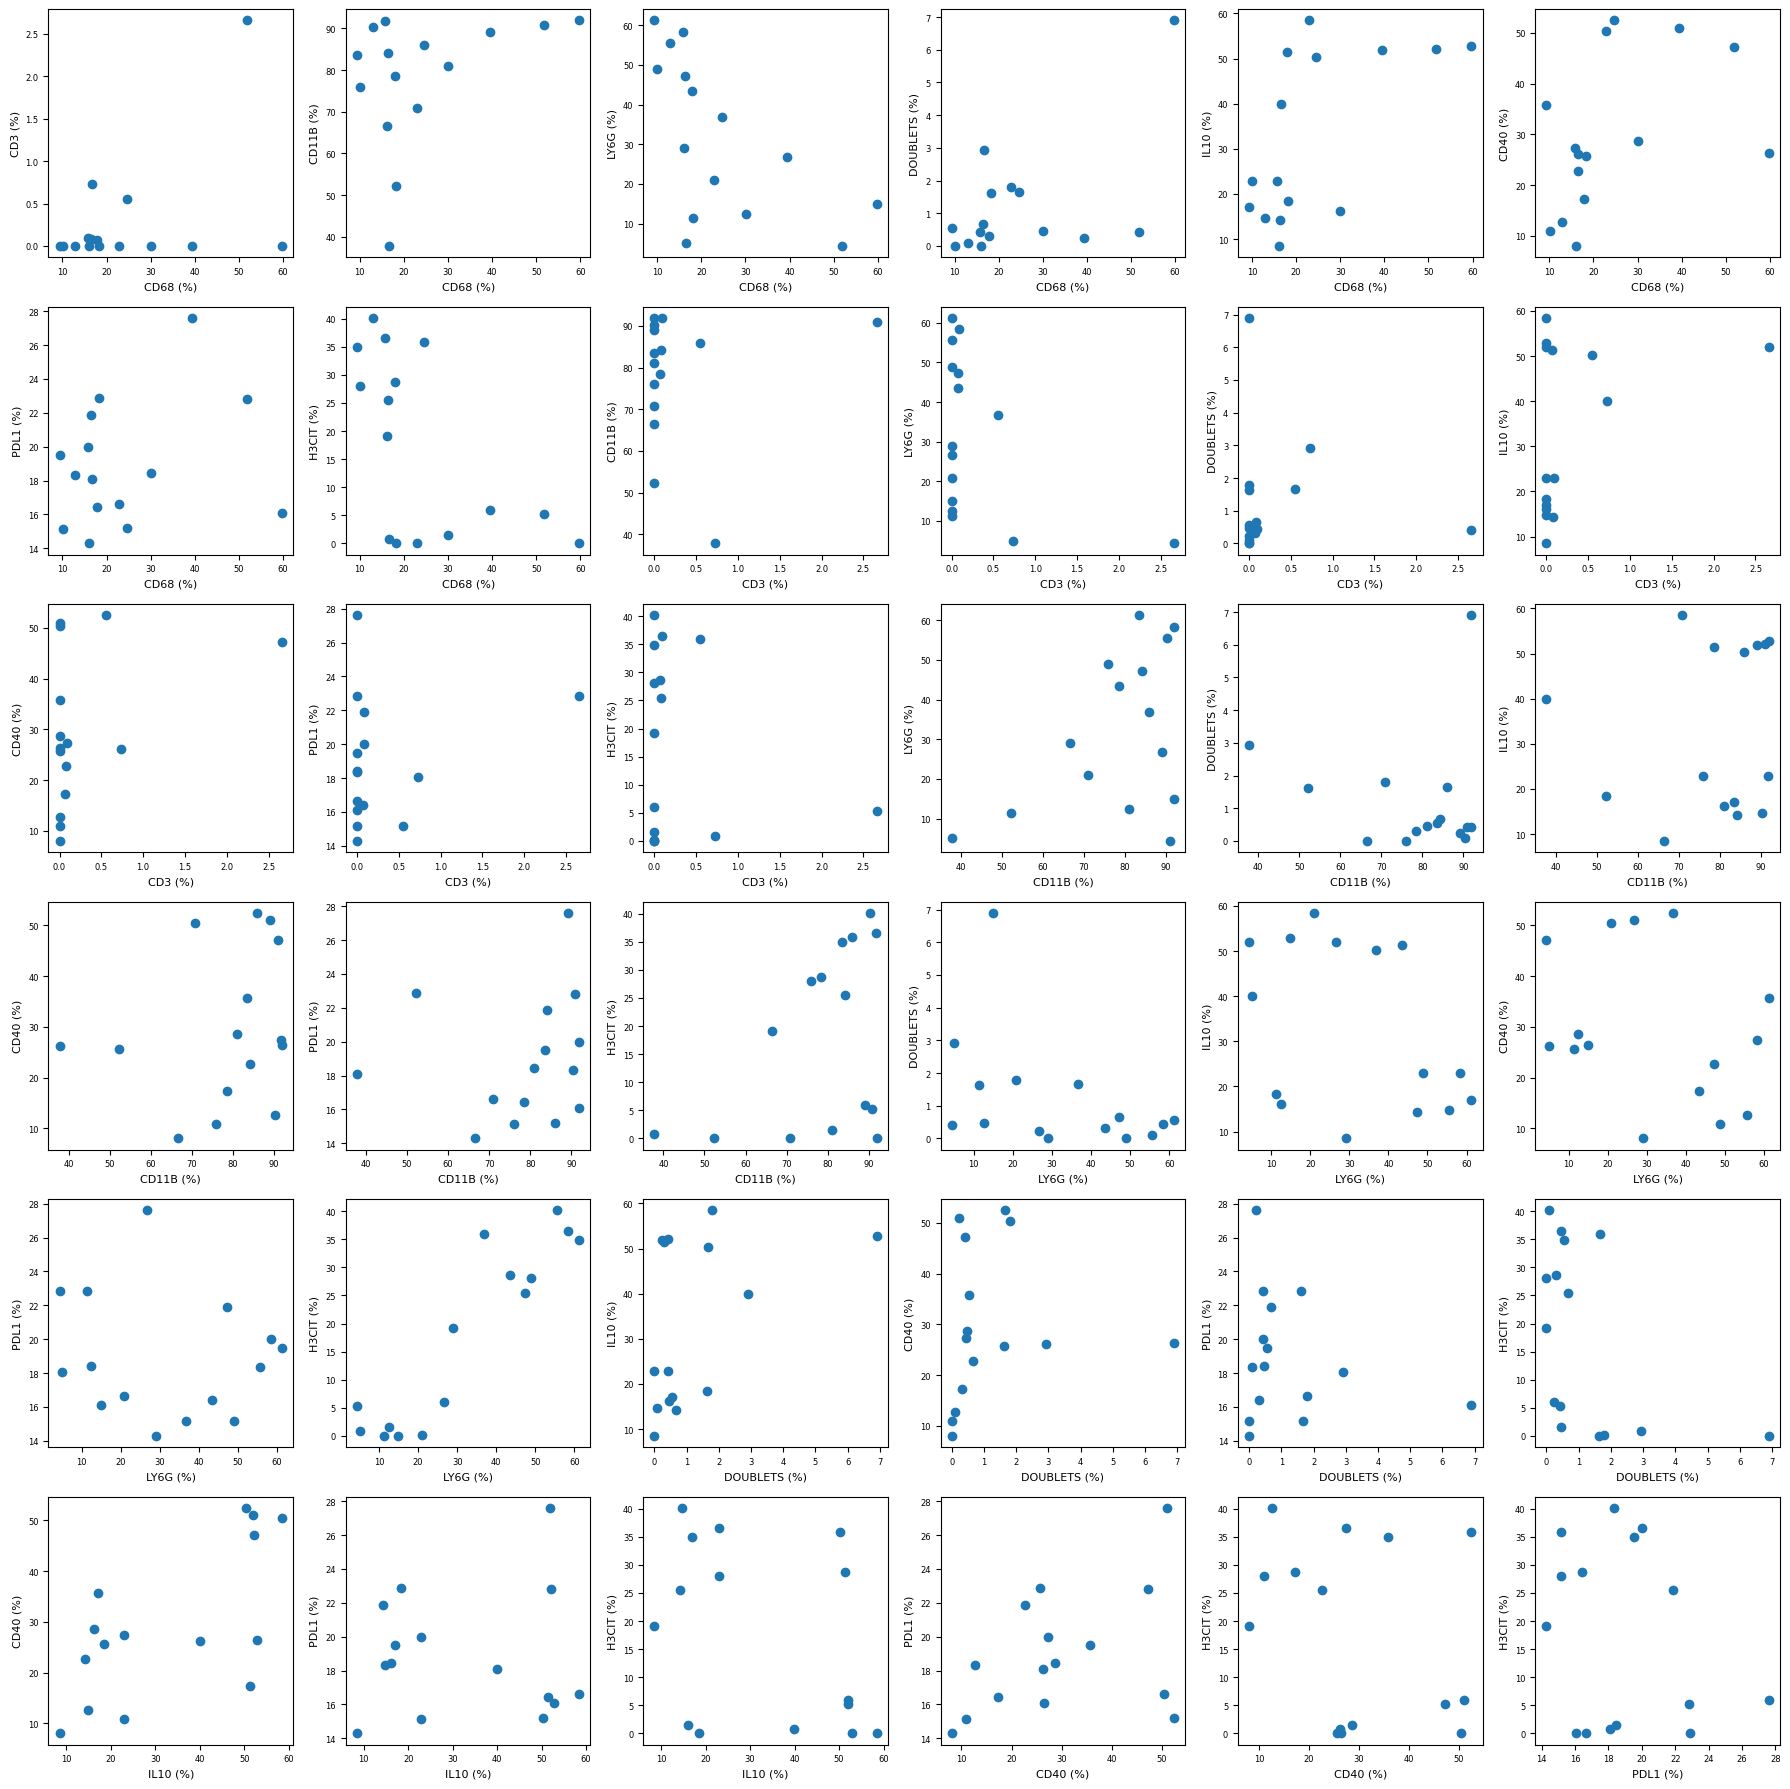

In [81]:
import itertools
import math
import matplotlib.pyplot as plt

# Assume cluster_pct is your DataFrame from before, indexed by cluster
stain_cols = [
    'CD68 (%)', 'CD3 (%)', 'CD11B (%)', 'LY6G (%)', 'DOUBLETS (%)',
    'IL10 (%)', 'CD40 (%)', 'PDL1 (%)', 'H3CIT (%)'
]

n = len(stain_cols)
# Determine grid size (e.g. a square or nearly square)
cols = rows = math.ceil(math.sqrt(n*(n-1)/2))

fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
axes = axes.flatten()

for ax, (x_col, y_col) in zip(axes, itertools.combinations(stain_cols, 2)):
    ax.scatter(cluster_pct[x_col], cluster_pct[y_col])
    ax.set_xlabel(x_col, fontsize=8)
    ax.set_ylabel(y_col, fontsize=8)
    ax.tick_params(labelsize=6)

# If there are unused subplots, turn them off
for empty_ax in axes[len(list(itertools.combinations(stain_cols, 2))):]:
    empty_ax.set_visible(False)

plt.tight_layout()
plt.show()


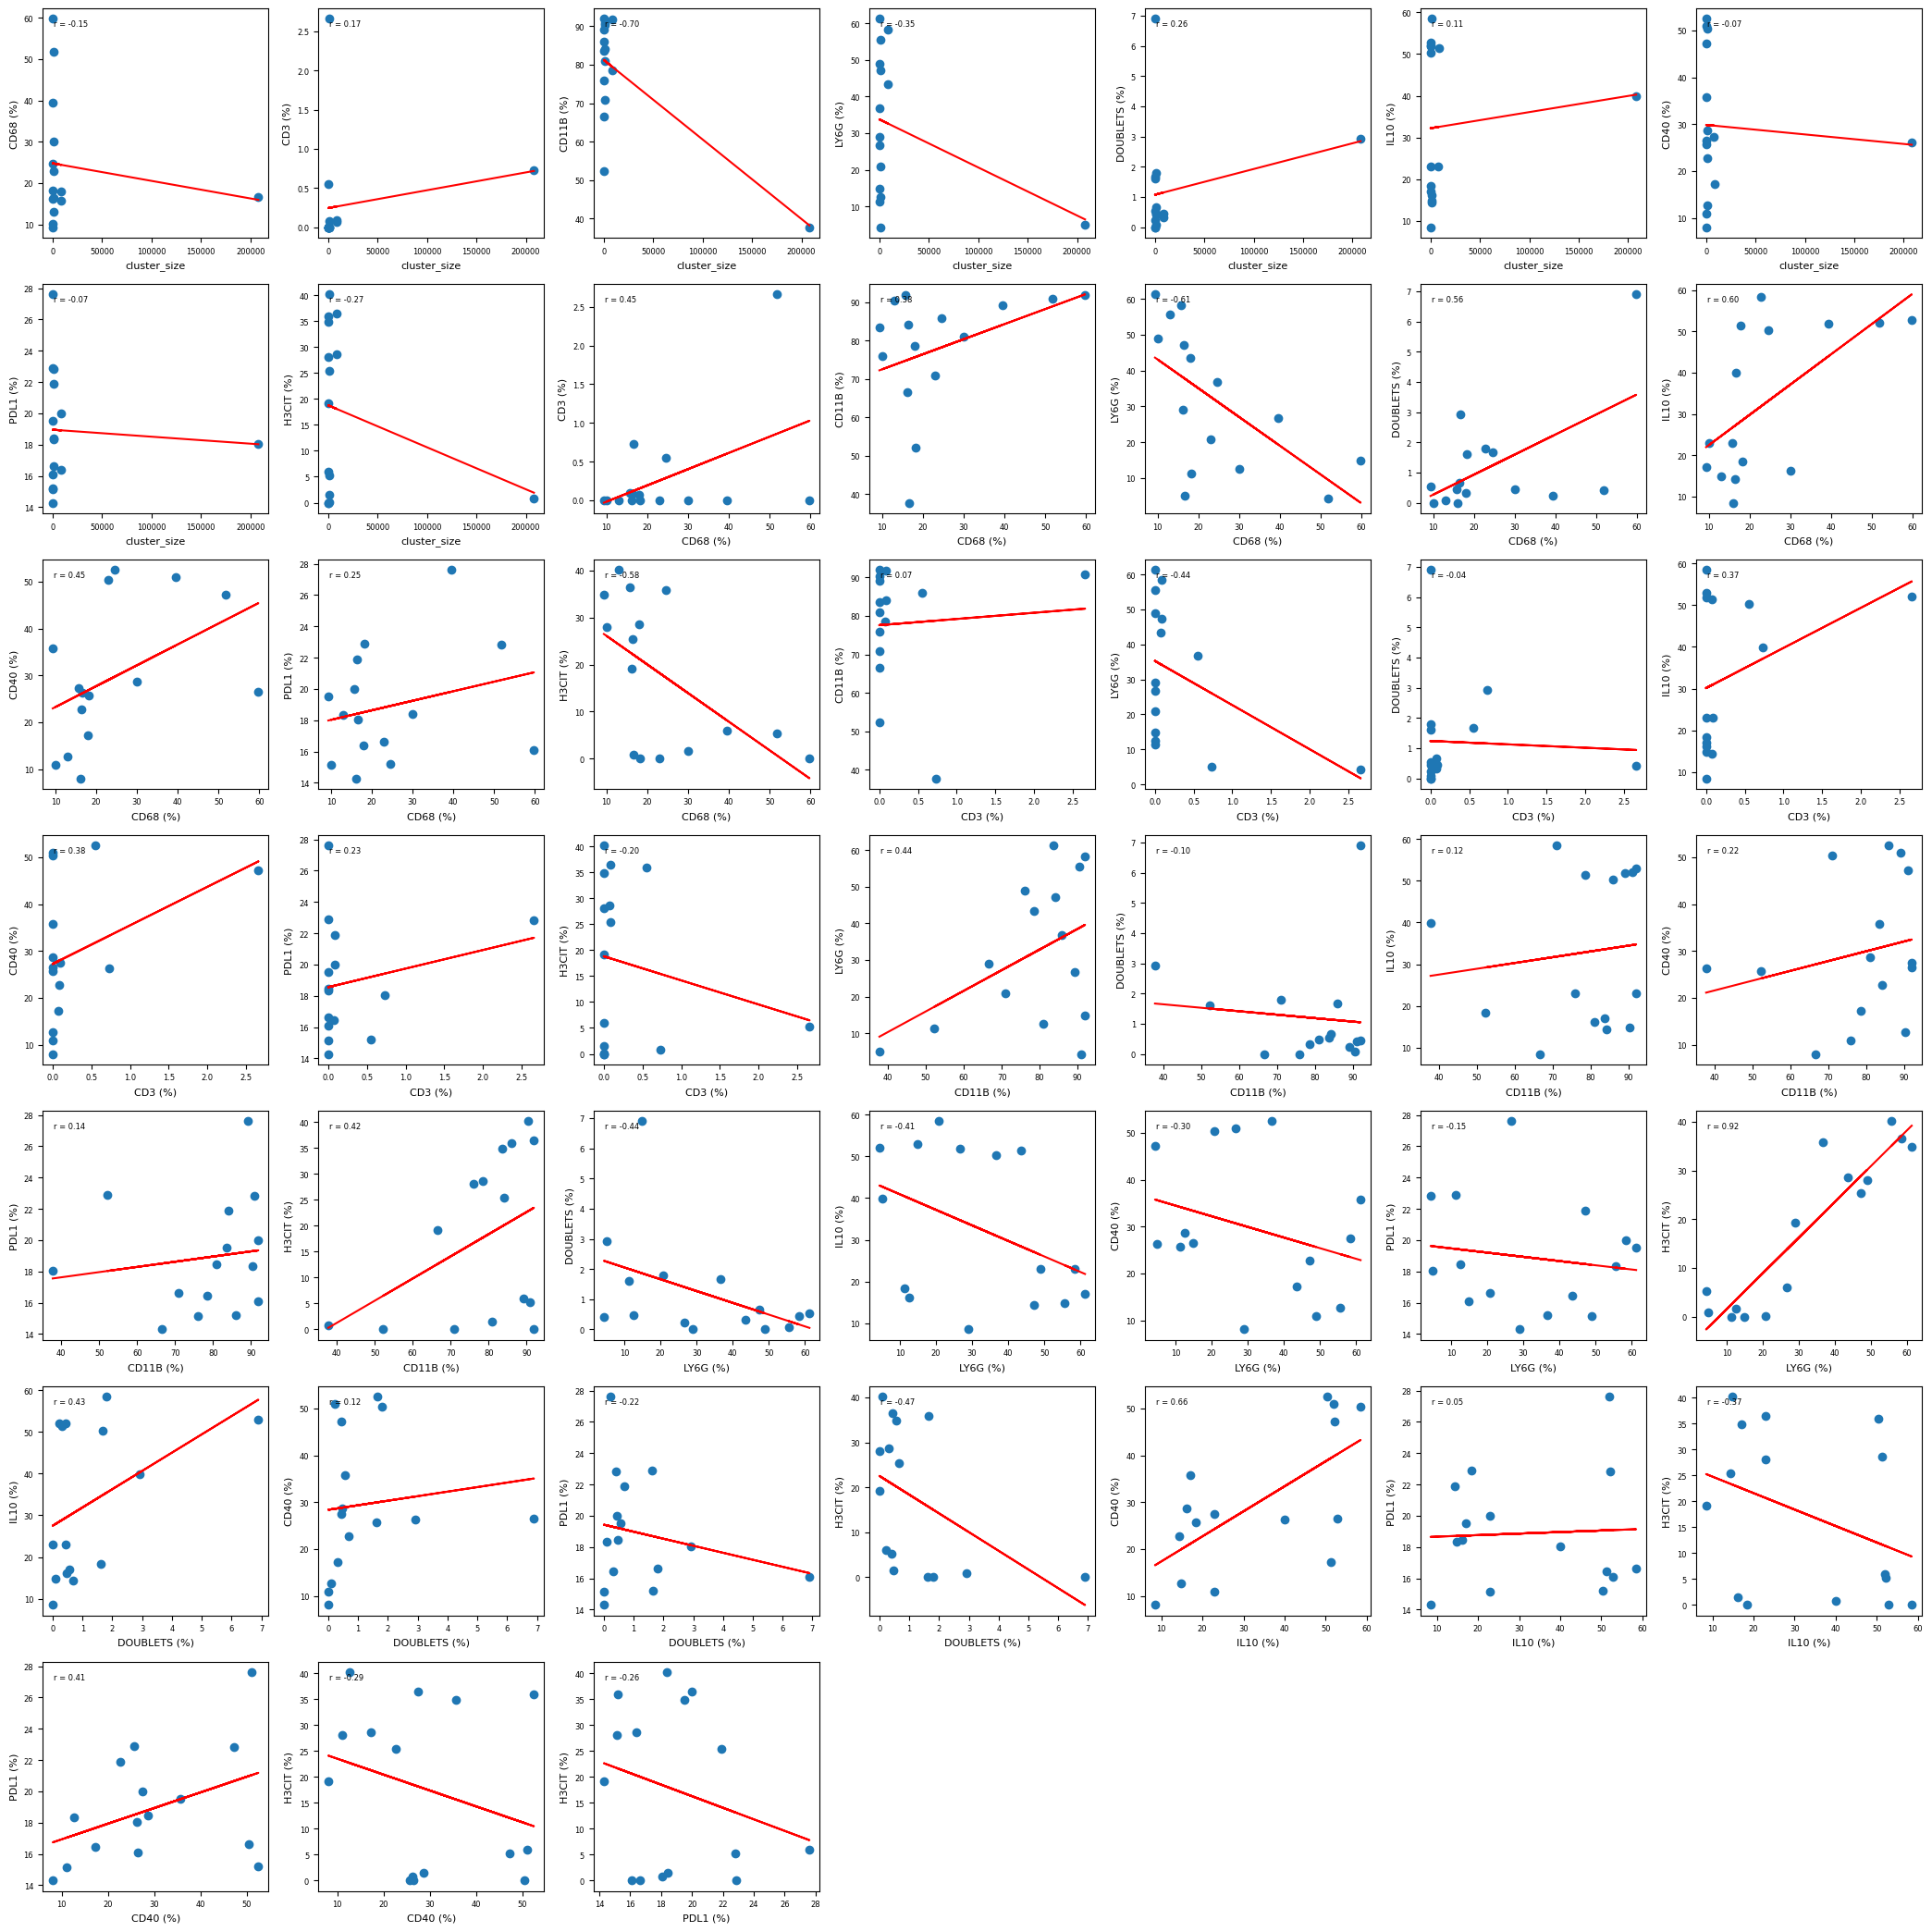

In [82]:
import itertools
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

# stain_cols should be the list of your percent columns, e.g.:
# stain_cols = ['CD68 (%)', 'CD3 (%)', ..., 'H3CIT (%)']
stain_cols = cluster_pct.columns.tolist()
pairs = list(itertools.combinations(stain_cols, 2))
n_pairs = len(pairs)
grid_size = math.ceil(math.sqrt(n_pairs))

fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*3, grid_size*3))
axes = axes.flatten()

for ax, (x_col, y_col) in zip(axes, pairs):
    x = cluster_pct[x_col]
    y = cluster_pct[y_col]
    
    # Linear regression
    slope, intercept, r_value, p_value, stderr = linregress(x, y)
    line_y = slope * x + intercept
    
    # Plot
    ax.scatter(x, y)
    ax.plot(x, line_y, color='red')  # ← make the regression line red
    
    # Formatting
    ax.set_xlabel(x_col, fontsize=8)
    ax.set_ylabel(y_col, fontsize=8)
    ax.tick_params(labelsize=6)
    ax.text(0.05, 0.95, f"r = {r_value:.2f}",
            transform=ax.transAxes, va='top', fontsize=6)

# Hide any unused axes
for ax in axes[n_pairs:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


# Review the ouput above before continuing

If the graph above looks correct then move to next cell below. Running the next cell will update the csv file and rewrite it by adding the cluster labels column. Make sure you are ok with this before running next cell. 

In [83]:
# 5) (Optional) Save your updated DataFrame
df.to_csv(first_csv, index=False)